
# Week 6 — Task → Chart Cheat Sheet (Matplotlib)

This notebook generates one visual on the slide:

- **Compare categories at one time**
  - Sorted bar chart (baseline at zero)
  - Cleveland dot plot for dense labels
- **Rank items**
  - Dot/bar with sorting; show labels for top/bottom
- **Before–after (2 time points)**
  - Slopegraph (connect the two points)
  - Paired dot plot (dumbbell)
- **Trends over time (many points)**
  - Line chart (shared y-axis across panels)
- **Many groups across time**
  - Small multiples of lines; keep identical scales
- **Part-to-whole (few parts)**
  - Stacked bars (avoid pie for precision)

In [1]:

# Setup
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
rng = np.random.default_rng(2102)
plt.rcParams.update({"figure.dpi": 150, "savefig.dpi": 200})

# Small real-world-style dataset (Gapminder subset: 1997 & 2007)
gap = pd.DataFrame([
    ("China","Asia",1997,70.426,1230075000,2289.234136),
    ("China","Asia",2007,72.961,1318683096,4959.114854),
    ("India","Asia",1997,61.765,1012000000,1458.817442),
    ("India","Asia",2007,64.698,1110396331,2452.210407),
    ("United States","Americas",1997,76.81,272911760,35767.43303),
    ("United States","Americas",2007,78.242,301139947,42951.65309),
    ("Germany","Europe",1997,77.34,82164700,27788.88416),
    ("Germany","Europe",2007,79.406,82400996,32170.37442),
    ("Brazil","Americas",1997,69.388,168546719,7957.980824),
    ("Brazil","Americas",2007,72.39,190010647,9065.800825),
    ("South Africa","Africa",1997,53.365,42835005,7479.188244),
    ("South Africa","Africa",2007,49.339,43997828,9269.657808),
    ("Japan","Asia",1997,80.69,125956499,28816.58499),
    ("Japan","Asia",2007,82.603,127467972,31656.06806),
    ("Canada","Americas",1997,78.61,30305843,28954.92589),
    ("Canada","Americas",2007,80.653,33390141,36319.23501),
], columns=["country","continent","year","lifeExp","pop","gdpPercap"])

gap.head()


,country,continent,year,lifeExp,pop,gdpPercap
0,China,Asia,1997,70.426,1230075000,2289.234136
1,China,Asia,2007,72.961,1318683096,4959.114854
2,India,Asia,1997,61.765,1012000000,1458.817442
3,India,Asia,2007,64.698,1110396331,2452.210407
4,United States,Americas,1997,76.810,272911760,35767.433030


## Compare categories at one time → Sorted bar (baseline at zero)

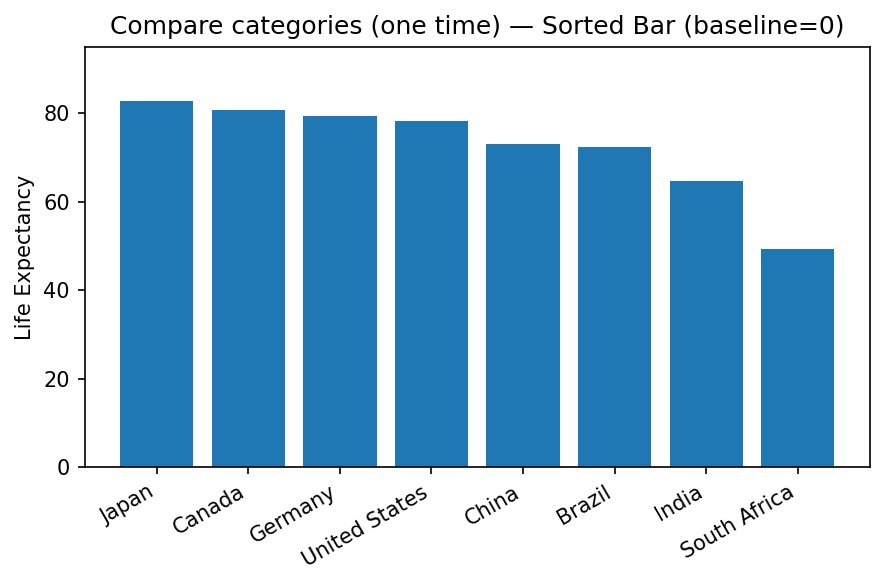

In [3]:
##Sorting the data first
yr = gap[gap.year==2007].copy().sort_values("lifeExp", ascending=False).head(10)

plt.figure(figsize=(6,4))
x = np.arange(len(yr))
plt.bar(x, yr["lifeExp"].values)
plt.xticks(x, yr["country"].values, rotation=30, ha="right")
plt.ylabel("Life Expectancy")
plt.title("Compare categories (one time) — Sorted Bar (baseline=0)")

##pay attention to maximum value for the y-axis
plt.ylim(0, max(yr["lifeExp"].values)*1.15)

plt.tight_layout()
plt.show()


## Compare categories at one time → Cleveland dot (dense labels)

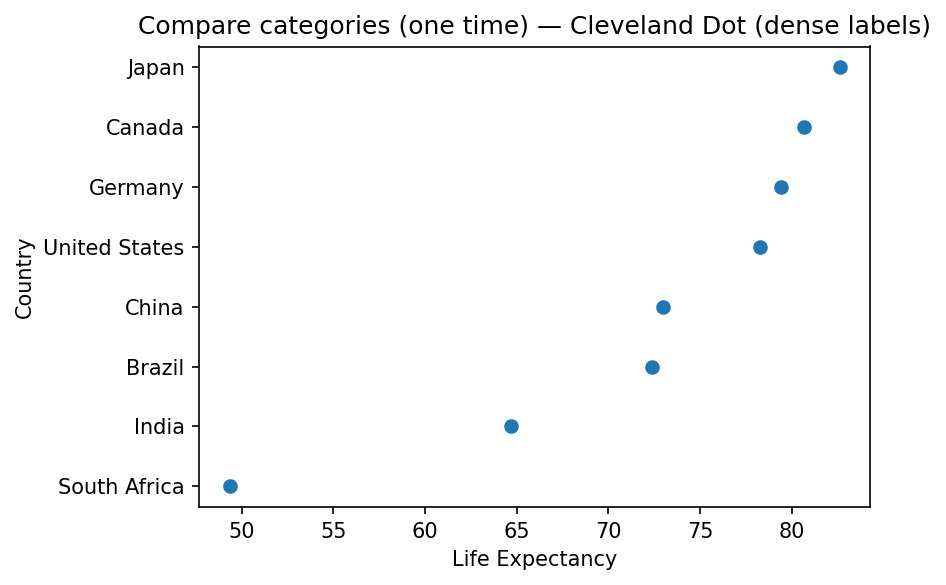

In [5]:
## Sort the data
yr_sorted = yr.sort_values("lifeExp")

plt.figure(figsize=(6,4))

## pay attention about how to prepare ticks/labels for the y-axis
y = np.arange(len(yr_sorted))

plt.plot(yr_sorted["lifeExp"].values, y, 'o')

plt.yticks(y, yr_sorted["country"].values)
plt.xlabel("Life Expectancy")
plt.ylabel("Country")
plt.title("Compare categories (one time) — Cleveland Dot (dense labels)")
plt.tight_layout()
plt.show()


## Rank items → Bar (sorted) with labels for top/bottom

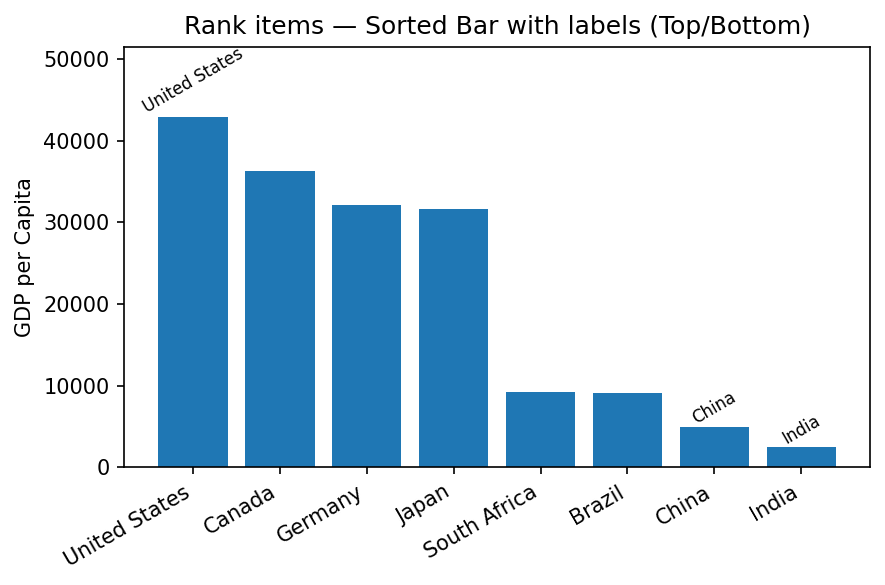

In [14]:

df = gap[gap.year==2007].copy().sort_values("gdpPercap", ascending=False).head(8)
plt.figure(figsize=(6,4))
x = np.arange(len(df))
plt.bar(x, df["gdpPercap"].values)
plt.xticks(x, df["country"].values, rotation=30, ha="right")
plt.ylabel("GDP per Capita")
plt.title("Rank items — Sorted Bar with labels (Top/Bottom)")

##Choose which bar(s) to annotate with text
# for i in [0,1,len(df)-2,len(df)-1]:
# for i in [0,1,2,3,4,5,6,7]:
for i in [0,6,7]:
    plt.text(x[i], df["gdpPercap"].values[i], f"{df['country'].values[i]}", ha="center", va="bottom", fontsize=8, rotation=30)

plt.ylim(0, df["gdpPercap"].max() * 1.2)

plt.tight_layout()
plt.show()


## Rank items → Dot plot (sorted), annotate top & bottom

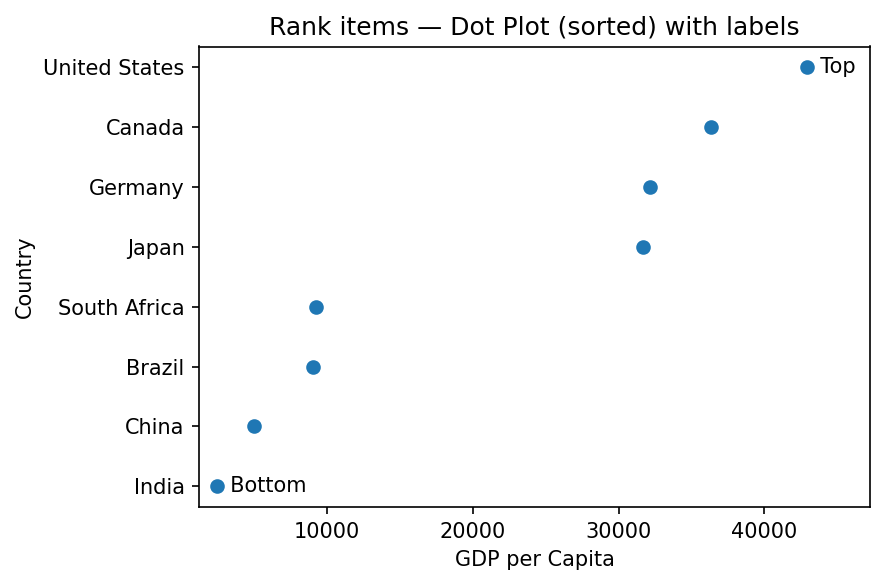

In [24]:

df2 = gap[gap.year==2007].copy().sort_values("gdpPercap")
plt.figure(figsize=(6,4))
y = np.arange(len(df2))
plt.plot(df2["gdpPercap"].values, y, 'o')
plt.yticks(y, df2["country"].values)
plt.xlabel("GDP per Capita")
plt.ylabel("Country")
plt.title("Rank items — Dot Plot (sorted) with labels")
plt.text(df2["gdpPercap"].values[-1], y[-1], "  Top", va="center")
plt.text(df2["gdpPercap"].values[0], y[0], "  Bottom", va="center")

plt.xlim(df2["gdpPercap"].min() * 0.5, df2["gdpPercap"].max() * 1.1)

plt.tight_layout()
plt.show()

## Before–after (2 time points) → Slopegraph

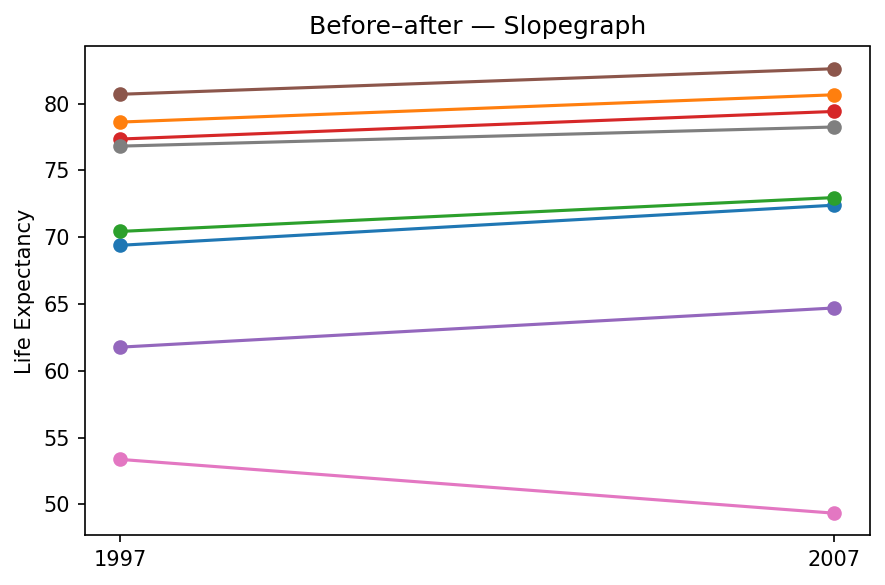

In [25]:

both = gap[gap.year.isin([1997,2007])]
have_both = both.groupby("country").filter(lambda g: g.year.nunique()==2)
countries = have_both.groupby("country")["pop"].max().sort_values(ascending=False).head(10).index.tolist()
dd = gap[gap.country.isin(countries) & gap.year.isin([1997,2007])]
piv = dd.pivot(index="country", columns="year", values="lifeExp").dropna()

plt.figure(figsize=(6,4))
for c in piv.index:
    plt.plot([0,1], [piv.loc[c,1997], piv.loc[c,2007]], marker='o')
plt.xticks([0,1], ["1997","2007"])
plt.ylabel("Life Expectancy")
plt.title("Before–after — Slopegraph")
plt.tight_layout()
plt.show()



## Before–after (2 time points) → Paired dot plot (dumbbell)

In [29]:
piv.head()
# piv2.head()

year,1997,2007
country,,
Brazil,69.388,72.390
Canada,78.610,80.653
China,70.426,72.961
Germany,77.340,79.406
India,61.765,64.698


year             1997    2007
country                      
South Africa   53.365  49.339
India          61.765  64.698
Brazil         69.388  72.390
China          70.426  72.961
United States  76.810  78.242


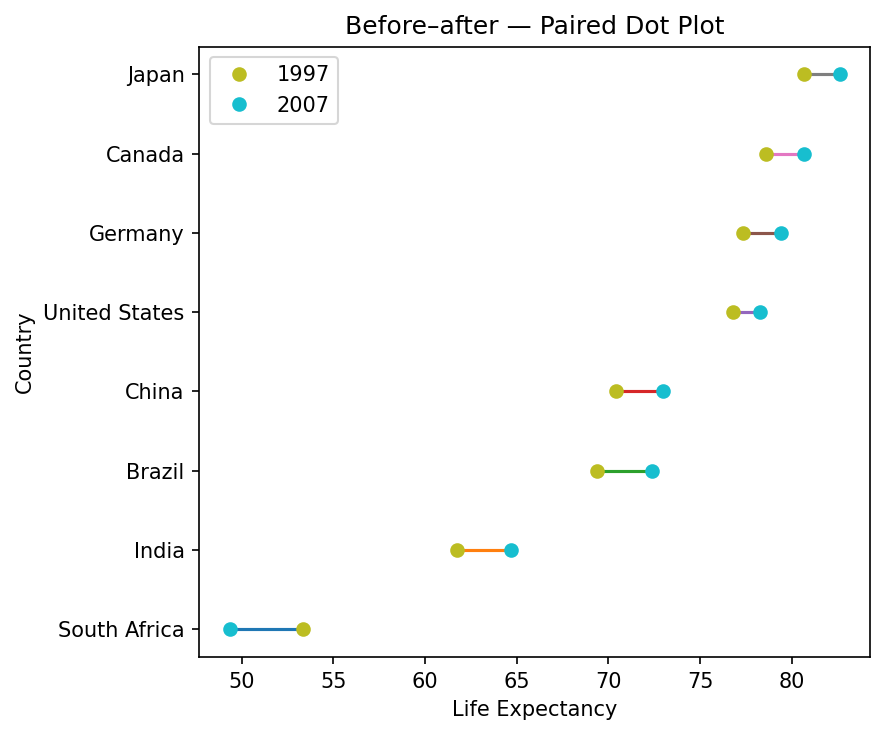

In [31]:

piv2 = piv.sort_values(2007)
print(piv2.head())
plt.figure(figsize=(6,5))
yy = np.arange(len(piv2.index))
for i, c in enumerate(piv2.index):
    plt.plot([piv2.loc[c,1997], piv2.loc[c,2007]], [yy[i], yy[i]], '-')
plt.plot(piv2[1997].values, yy, 'o', label="1997")
plt.plot(piv2[2007].values, yy, 'o', label="2007")
plt.yticks(yy, piv2.index.tolist())
plt.xlabel("Life Expectancy")
plt.ylabel("Country")
plt.title("Before–after — Paired Dot Plot")
plt.legend()
plt.tight_layout()
plt.show()

## Trends over time (many points) → Line chart (shared y-axis across panels)

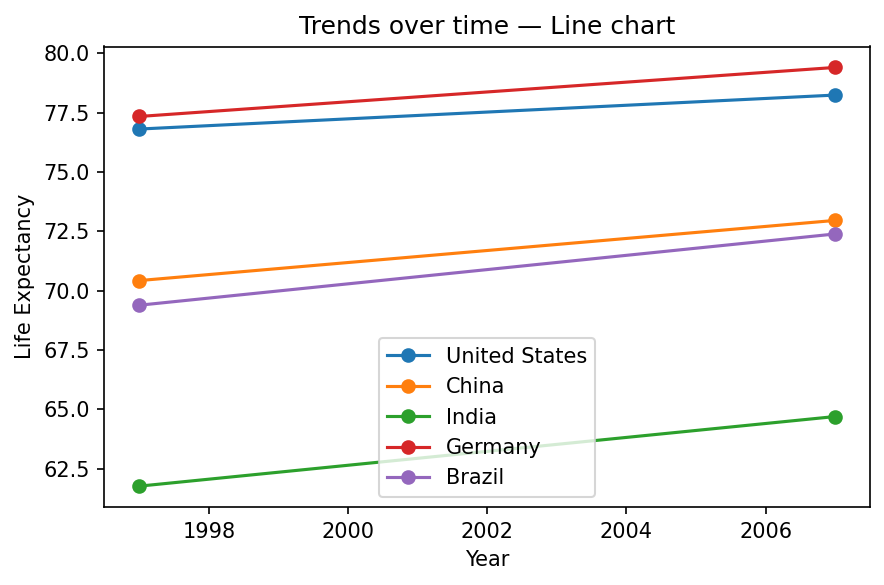

In [32]:

pivot_le = gap.pivot(index="year", columns="country", values="lifeExp")
sel = ["United States","China","India","Germany","Brazil"]

plt.figure(figsize=(6,4))
for c in sel:
    if c in pivot_le.columns:
        s = pivot_le[c].dropna()
        plt.plot(s.index, s.values, marker='o', label=c)
plt.xlabel("Year"); plt.ylabel("Life Expectancy")
plt.title("Trends over time — Line chart")
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
# plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.) 

plt.tight_layout()
plt.show()


## Many groups across time → Small multiples (identical y-scale)

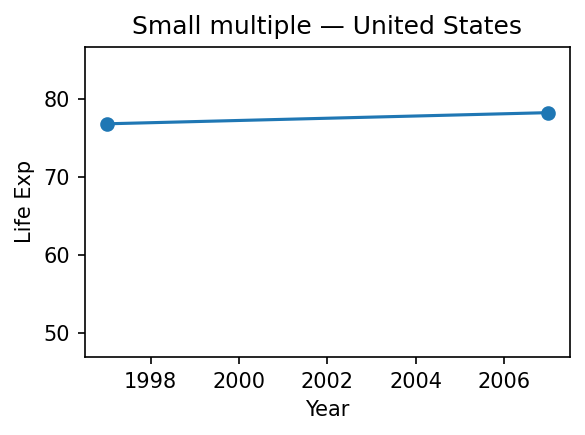

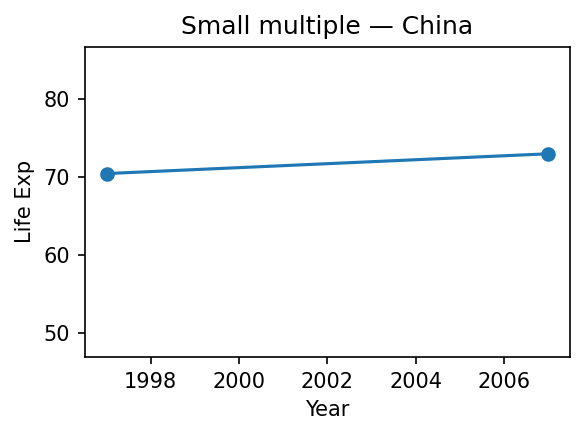

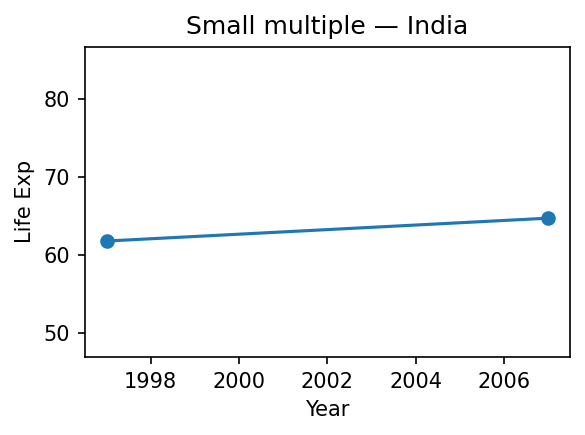

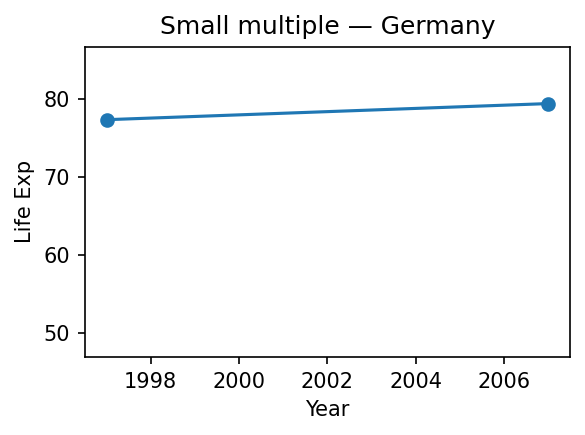

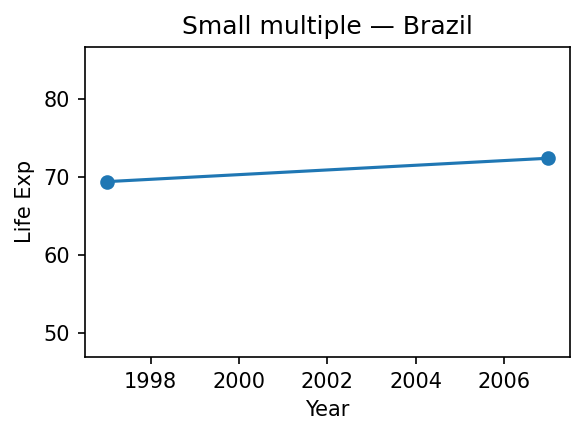

In [33]:

ylim = (gap["lifeExp"].min()*0.95, gap["lifeExp"].max()*1.05)
multi_paths = []
for c in sel:
    plt.figure(figsize=(4,3))
    s = pivot_le[c].dropna()
    plt.plot(s.index, s.values, marker='o')
    plt.ylim(ylim)
    plt.xlabel("Year"); plt.ylabel("Life Exp")
    plt.title(f"Small multiple — {c}")
    plt.tight_layout()
    plt.show()
    # multi_paths.append(p)

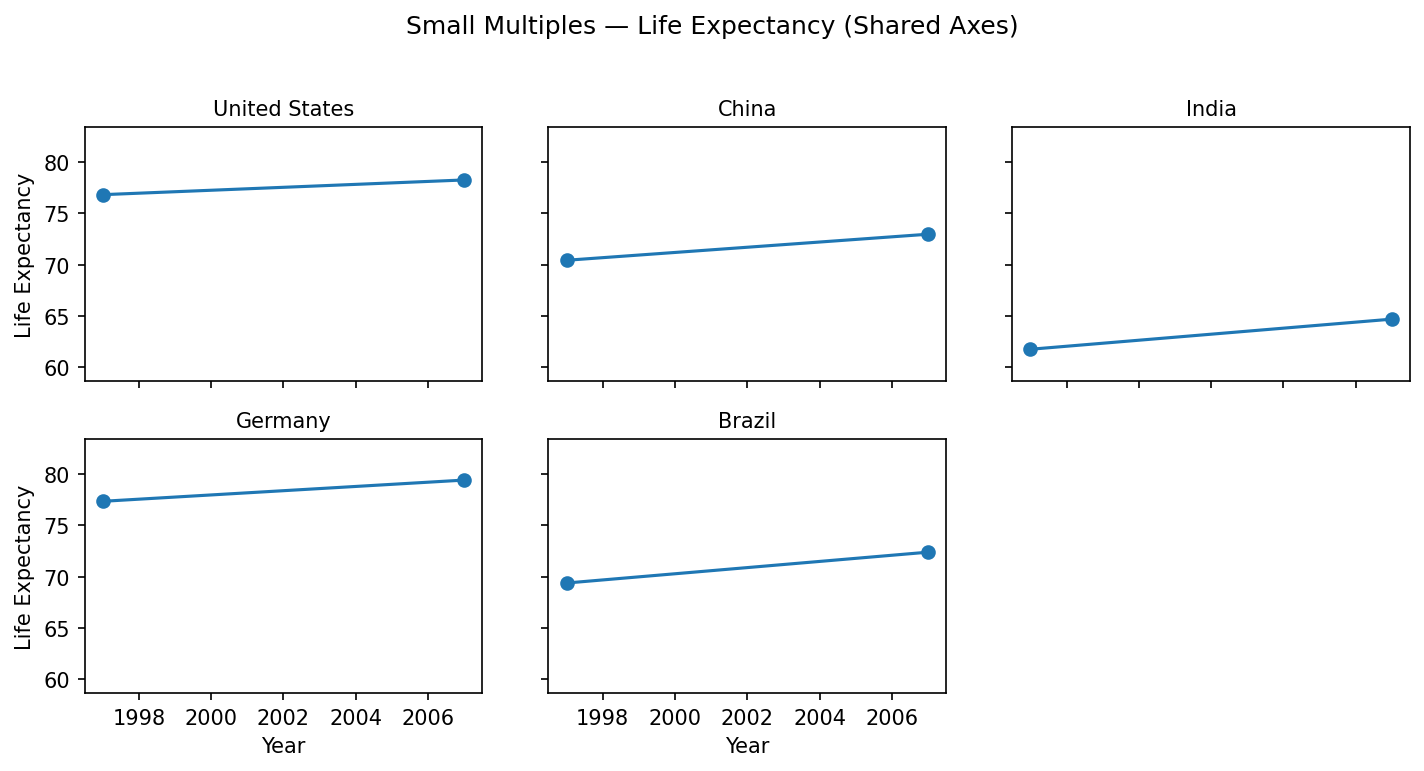

In [34]:
import math
# Dynamic grid size
n = len(sel)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(3.2*cols, 2.6*rows), sharex=True, sharey=True)
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Common y-limits
all_vals = []
for c in sel:
    s = pivot_le[c].dropna()
    all_vals.extend(s.values.tolist())
ymin = min(all_vals) * 0.95
ymax = max(all_vals) * 1.05

for idx, c in enumerate(sel):
    ax = axes[idx]
    s = pivot_le[c].dropna()
    ax.plot(s.index, s.values, marker='o')
    ax.set_title(c, fontsize=10)
    ax.set_ylim(ymin, ymax)
    r, col = divmod(idx, cols)
    if r == rows - 1:
        ax.set_xlabel("Year")
    if col == 0:
        ax.set_ylabel("Life Expectancy")

# Hide unused panels
for idx in range(n, rows*cols):
    axes[idx].set_visible(False)

fig.suptitle("Small Multiples — Life Expectancy (Shared Axes)", y=0.98, fontsize=12)
fig.tight_layout(rect=[0, 0, 1, 0.96])


## Part-to-whole (few parts) → Stacked bars (avoid pie)

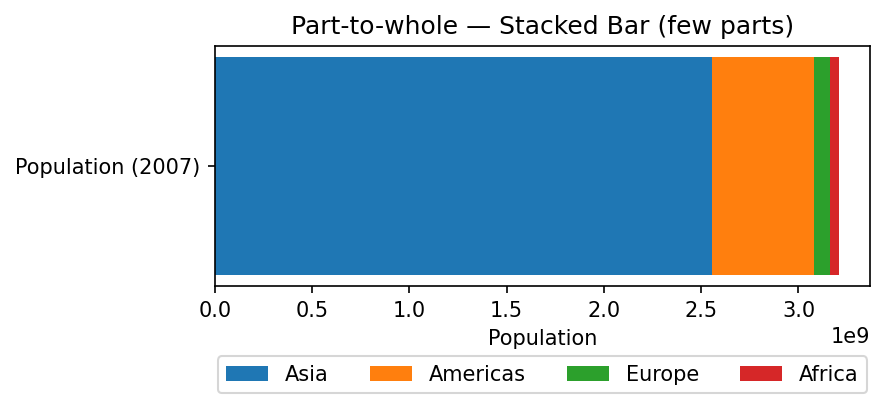

In [51]:

pop2007 = gap[gap.year==2007].groupby("continent")["pop"].sum().sort_values(ascending=False)
labels = pop2007.index.tolist()
vals = pop2007.values

plt.figure(figsize=(6,3))
left = 0
for lab, v in zip(labels, vals):
    plt.barh([0], [v], left=left, label=lab)
    left += v
plt.yticks([0], ["Population (2007)"])
plt.xlabel("Population"); plt.title("Part-to-whole — Stacked Bar (few parts)")
plt.legend(ncol=len(labels), bbox_to_anchor=(0.5, -0.25), loc="upper center")
# plt.legend(ncol=len(labels), bbox_to_anchor=(0.5, -0.8), loc="lower center")

plt.tight_layout()
plt.show()